# One stage model
Implementation of the linear one stage glacier model following [Roe and Baker, 2014](https://doi.org/10.3189/2014jog14j016)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
def length_perturb(t, temp_trend, prcp_trend):
    phi = 0.34
    A_tot = 4e6
    A_melt = 1.8e6
    A_abl = 1.6e6
    w = 500
    H = 50
    gamma = 6.5e-3
    mu = 0.5
    alpha = -mu*A_melt/(w*H)
    beta = A_tot/(w*H)
    tau = w*H/(mu*gamma*np.tan(phi)*A_abl)
    return tau*(alpha*temp_trend + beta*prcp_trend)*(t - tau*(1-np.exp(-t/tau)))

In [30]:
phi = 0.34
A_tot = 4e6
A_melt = 1.8e6
A_abl = 1.6e6
w = 500
H = 50
gamma = 6.5e-3
mu = 0.5
alpha = -mu*A_melt/(w*H)
beta = A_tot/(w*H)
tau = w*H/(mu*gamma*np.tan(phi)*A_abl)

13.59115378171169
13.59115378171169


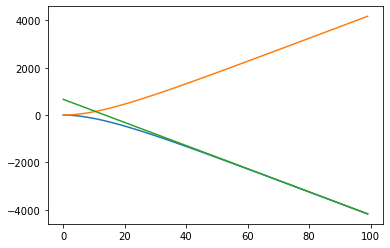

In [36]:
years = np.arange(100)
plt.plot(years, length_perturb(years, 0.1, 0))
plt.plot(years, length_perturb(years, -0.1, 0))
plt.plot(years, tau*(alpha*0.1 + beta*0)*(years-tau))


In [163]:
np.random.choice([-1,0,1], alpha.size)

TypeError: choice() got an unexpected keyword argument 'seed'

In [173]:
alpha

array([ 0,  6,  9, 14, 20, 26, 31, 34, 39, 45, 51, 56, 60, 66, 70, 76, 80,
       84])

In [180]:
print(pd.DataFrame([alpha, beta]).to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrr}
\toprule
{} &   0  &        1  &        2  &         3  &         4  &         5  &         6  &         7  &         8  &         9  &         10 &         11 &        12 &         13 &         14 &         15 &         16 &        17 \\
\midrule
0 &  0.0 &  6.000000 &  9.000000 &  14.000000 &  20.000000 &  26.000000 &  31.000000 &  34.000000 &  39.000000 &  45.000000 &  51.000000 &  56.000000 &  60.00000 &  66.000000 &  70.000000 &  76.000000 &  80.000000 &  84.00000 \\
1 &  0.0 &  3.995932 &  5.986241 &   9.281273 &  13.180142 &  16.992554 &  20.081638 &  21.888112 &  24.805986 &  28.125506 &  31.204709 &  33.551873 &  35.26439 &  37.519421 &  38.789556 &  40.305562 &  41.036411 &  41.53019 \\
\bottomrule
\end{tabular}



In [172]:
alpha = np.arange(0, 90, 5)
alpha[1:] += np.random.choice([-1,0,1], alpha.size-1)
alpha
beta = np.arcsin(np.sin(alpha/180*np.pi)/1.5)*180/np.pi

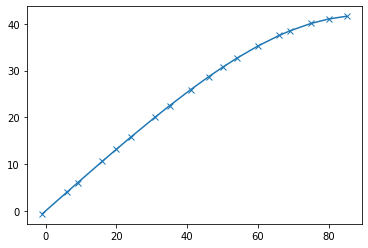

In [170]:
plt.plot(alpha, beta, marker='x')